<p align = "center" draggable=”false” ><img src="https://user-images.githubusercontent.com/37101144/161836199-fdb0219d-0361-4988-bf26-48b0fad160a3.png" 
     width="200px"
     height="auto"/>
</p>

# EDA with Walmart Sales Data

## Business Objectives

Walmart, the retail giant that operates a chain of hypermarkets, wants to understand their weekly sales data, especially the impact from holidays and big events; specifically, Super Bowl, Labor Day, Thanksgiving, and Christmas. In addition, Walmart wants to consider the effect from different macroeconomic and external factors on the weekly sales. 

## Learning Objectives

At the end of this session, you will know how to

1. Manipulate data of different types using `pandas`
2. Visualize data with `matplotlib` and `seaborn` to extract insights 
3. Perform feature engineering
4. Build a pipeline to preprocess data and fit a simple model using `sklearn` library

*Note: if you see code that's unfamiliar to you, look up for the documentation, and try to understand what it does.*

## Data Overview

- Original sales data were collected from 45 stores across the United States; however, for this session, you will first inspect data from three stores and later focus on just store 1. 

- Each store is of certain type and size, and there are multiple departments in a store. 

- The dataset has a temporal component, we mostly ignore this in this session and will discuss time series related techniques later in the cohort.

In [153]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # allow multiple outputs in a cell
import warnings
warnings.filterwarnings("ignore")

## Task I: Load Data 

Built on top of `numpy`, `pandas` is one of the most widely used tools in machine learning. Its rich capabilities are used for exploring, cleaning, visualizing, and transforming data.  We need to import the library to access all of its capabilities. 

In [154]:
import pandas as pd

Use `pd.read_csv` to load `train_comb.csv` that contains weekly sales, metadata, and macroeconomic features from three stores into a pandas DataFrame.

In [155]:
filepath = '../dat/train_comb.csv'
data = pd.read_csv(filepath) 

Verify that the data is loaded correctly by running `data.head(3)` to see the first few row ( AVOID printing out the entire DataFrame, i.e., `data` or `print(data)`; it might be trivial for small dataset but it can crash your kernel when the dataset is big and slow down the initial data exploration process ).

In [156]:
data.head(3)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,"24,924.50",False,42.31,2.57,NaN,NaN,NaN,NaN,NaN,211.10,8.11,A,151315
1,1,1,2010-02-12,"46,039.49",True,38.51,2.55,NaN,NaN,NaN,NaN,NaN,211.24,8.11,A,151315
2,1,1,2010-02-19,"41,595.55",False,39.93,2.51,NaN,NaN,NaN,NaN,NaN,211.29,8.11,A,151315


❓ Question 1:

Look at the output of the previous cell to get an idea of each column and then write a few sentences describing what you notice about the data. 
You can also use `data.sample(3)` to draw random samples from the data (hint: look into the number of rows and columns, document any missing values, what the data types are and what the date ranges of the data collected are etc.).

Description of the data:
* the dataset contains 30,990 rows and 16 columns
* each data point (row) gives the weekly sales per department for a Walmart store
* description of each column:
    - column_name: Store; data type: int64; missing values: none; minimum value: 1; maximum value: 13; mean: 6.05; comment: this tells us which store it is
    - column_name: Dept; data type: int64; missing values: none; minimum value: 1; maximum value: 99; mean: 44.51; comment. this tells us which department within the store it is
    - column_name: Date; data type: datetime64[ns]; missing values: none; minimum value: n/a; maximum value: n/a; mean: n/a; comment: this tells us which week the data is from, it's always the Friday of the given week
    - column_name: Weekly_Sales; data type: float64; missing values: none; minimum value: -898; maximum value: 385,051; mean: 26,087; comment: this tells us the sales amount for the given week
    - column_name: IsHoliday; data type: bool; missing values: none; minimum value: n/a; maximum value: n/a; mean: n/a; comment: indicator whether there was a holiday within the week
    - column_name: Temperature; data type: float64; missing values: none; minimum value: 17; maximum value: 92; mean: 61.28; comment: indicates average Temperature in the week and location
    - column_name: Fuel_Price; data type: float64; missing values: none; minimum value: 2.51; maximum value: 3.91; mean: 3.24; comment: indicates the fuel price in the week
    - column_name: Markdown1; data type: float64; missing values: 19,928 (64%); minimum value: ; maximum value: ; mean: 9,542.6; comment: not sure what this column means
    - column_name: Markdown2; data type: float64; missing values: 21,730 (70%); minimum value: ; maximum value: ; mean: 4,586.5; comment: not sure what this column means
    - column_name: Markdown3; data type: float64; missing values: 20,211 (65%); minimum value: ; maximum value: ; mean: 2,063.4; comment: not sure what this column means
    - column_name: Markdown4; data type: float64; missing values: 20,000 (65%); minimum value: ; maximum value: ; mean: 4,676.4; comment: not sure what this column means
    - column_name: Markdown5; data type: float64; missing values: 19,928 (64%); minimum value: ; maximum value: ; mean: 6,378.7; comment: not sure what this column means
    - column_name: CPI; data type: float64; missing values: none; minimum value: 126; maximum value: 223; mean: 157.5; comment: not sure what this column means
    - column_name: Unemployment; data type: float64; missing values: none; minimum value: 3.9; maximum value: 8.6; mean: 6.9; comment: not sure what this column means
    - column_name: Type; data type: object; missing values: n/a; minimum value: n/a; maximum value: n/a; mean: n/a; comment: not sure what this column means
    - column_name: Size; data type: int64; missing values: none; minimum value: 151,315; maximum value: 219,622; mean: 192,481; comment: not sure what this column means
* 'Weekly_Sales' is the dependent variable and we're trying to understand which of the other variables (columns) effect this or not


Description of the data:
-each data point gives the weekly sales per department for a Walmart store
-for every data point we get additional info:
    -IsHoliday: True if there was a holiday in the week e.g. Labor Day
    -Temperature: 
    -Fuel_Price: cost of fuel in the region
    -CPI: the Consumer Price Index at the given data; not sure if there might be different values per area code; see definition here: https://www.bls.gov/cpi/
    -Unemployment: looks like unemployment rate in per cent


*Acceptable responses include the number of rows and columns in the dataset, the data types of the elements, how many NaNs there are (and perhaps which columns and/or rows tend to have them), the range of values in each column or other descriptive statistics, some commentary on what this data represents, any initial concerns about how you think we should model this data, or any other commentary you would like to add.*

Use `.shape` to inspect the size of the data: sample size and number of features.

In [157]:
data.shape

(30990, 16)

<details>
<summary>Expected Output</summary>
(30990, 16)
</details>

Extract the data for store 1 into a separate DataFrame. 

In [158]:
data_store1 = data.loc[data['Store'] == 1]

Let's take a random department, for example department 9, and retrieve the data.

In [159]:
data_store1_dept9 = data_store1.loc[data_store1['Dept'] == 9]

Verify the result using `.head()`, `.shape`.

In [160]:
data_store1_dept9.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
1144,1,9,2010-02-05,"16,930.99",False,42.31,2.57,NaN,NaN,NaN,NaN,NaN,211.10,8.11,A,151315
1145,1,9,2010-02-12,"16,562.49",True,38.51,2.55,NaN,NaN,NaN,NaN,NaN,211.24,8.11,A,151315
1146,1,9,2010-02-19,"15,880.85",False,39.93,2.51,NaN,NaN,NaN,NaN,NaN,211.29,8.11,A,151315
1147,1,9,2010-02-26,"15,175.52",False,46.63,2.56,NaN,NaN,NaN,NaN,NaN,211.32,8.11,A,151315
1148,1,9,2010-03-05,"24,064.70",False,46.50,2.62,NaN,NaN,NaN,NaN,NaN,211.35,8.11,A,151315


In [161]:
data_store1_dept9.shape

(143, 16)

<details>
<summary>Expected Output</summary>
(143, 16)
</details>


Let's visualize one full year of weekly sales. 
First, sort the data by date.
Then, plot the first 52 weeks of the weekly sales over time.

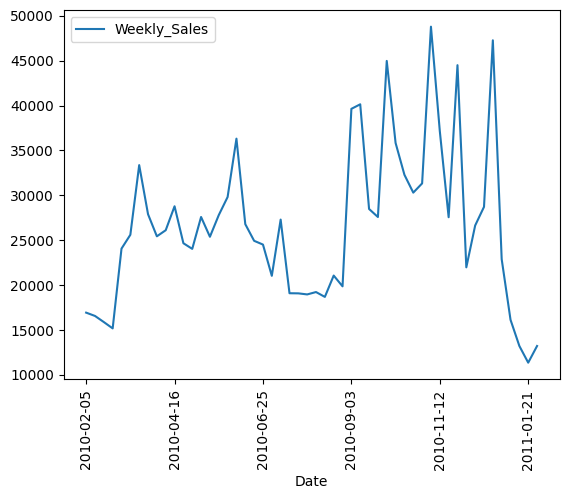

In [162]:
# First, sort values by date
data_store1_dept9 = data_store1_dept9.sort_values(by=['Date'])

# Then plot the weekly sales for the first 52 weeks, by setting the indez to Date
data_store1_dept9[['Date', 'Weekly_Sales']].iloc[:52]\
    .set_index('Date').plot(rot=90);

❓ Question 2:

Do you have any hypotheses about the holidays' impact on the sales?

    Hypothesis: Weekly sales will be higher in weeks with a holiday as compared to weeks with no holiday, because people make more, expensive food at home.
    
    However, the timing of the holiday makes a difference e.g. Labor Day is on a Monday, so people might buy the groceries the week before already.

**For the purpose of this notebook, we focus on the sales data from Store 1** that is saved in `train_store1.csv`. 

Let's read in the data.

In [163]:
df = pd.read_csv("../dat/train-store1.csv")

Let's work on extracting week, month, and year information from the `Date` column to be able to better manipulate the weekly data. Pandas comes with powerful capabilities to make this step easy. Reference: [tutorial
](https://pandas.pydata.org/docs/getting_started/intro_tutorials/09_timeseries.html). 

Before extracting the data, use `.dtypes` to check the datatype of the `Date` column. 

What's the difference between `df[['Date']]` and `df['Date']`?

In [164]:
df[['Date']].dtypes
#df['Date'] is a Series object; df[['Date']] is a DataFrame object and used to select multiple columns

Date    object
dtype: object

<details>
<summary>Expected Output</summary>
Date    object
dtype: object
</details>

Then, convert the Date column to a datetime object.

In [165]:
df.Date=pd.to_datetime(df.Date)

Verify that the `Date` column's datatype has changed as expected.

In [166]:
df[['Date']].dtypes 

Date    datetime64[ns]
dtype: object

In [167]:
# Hint: use the dt accessor
df['week'] = df['Date'].dt.isocalendar().week # YOUR CODE HERE
df['month'] = df['Date'].dt.month # YOUR CODE HERE 
df['year'] = df['Date'].dt.year # YOUR CODE HERE

Verify that now there are 19 columns in your DataFrame.

In [336]:
df.shape

(10244, 19)

❓ Question 3:

Last step before we look deeper into the features is to split the data set into training and testing datasets. 

Discuss: why do we want to perform EDA only on the training data, not the entire dataset? Shouldn't it be the more data the better?

Because we want to have an unbiased estimate of our model against the test dataset. To ensure that we should not look at the test dataset at all beforehand.

Split the data into training dataset (80%) and test dataset (20%). Use function `train_test_split` from `scikit-learn` ( a popular library for machine learning in Python ),  and set `random_state` to be 42 for reproducibility ( this is not the best way to do train-test-split due to the temporal nature of the data, however, we will ignore it for now).

In [169]:
from sklearn.model_selection import train_test_split

In [348]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

In [349]:
print('Original set  ---> ',df.shape,
      '\nTraining set  ---> ',df_train.shape,
      '\nTesting set   ---> ', df_test.shape)

Original set  --->  (10244, 19) 
Training set  --->  (8195, 19) 
Testing set   --->  (2049, 19)


<details>
<summary>Expected Output</summary>

    ```
    Original set  --->  (10244, 19) 
    Training set  --->  (8195, 19) 
    Testing set   --->  (2049, 19)
    ```
</details>

## Task II: Target, Features, and Distributions

We inspected the datatype of column `Date`. Now, let's find datatypes for all columns in `df_train`.

In [350]:
df_train.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
Type                    object
Size                     int64
week                    UInt32
month                    int64
year                     int64
dtype: object

<details>
<summary>Expected Output</summary>

```
Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
Type                    object
Size                     int64
week                     int64
month                    int64
year                     int64
dtype: object
```
</details>

Summary statistics provide you with a general understanding of the data. Use method `.describe()`. By default it reports statistics mean, max, min, quantiles for numerical features and counts, unique, mode for categorical features.

In [351]:
pd.options.display.float_format = "{:,.2f}".format
df_train.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,week,month,year
count,"8,195.00","8,195.00","8,195.00","8,195.00","8,195.00","2,931.00","2,424.00","2,878.00","2,931.00","2,931.00","8,195.00","8,195.00","8,195.00","8,195.00","8,195.00","8,195.00"
mean,1.00,44.65,"21,865.28",68.19,3.22,"8,045.43","2,961.55","1,236.83","3,683.59","5,023.69",216.00,7.61,"151,315.00",25.89,6.47,"2,010.96"
std,0.00,29.95,"27,970.00",14.16,0.43,"6,484.49","8,032.30","7,830.99","5,849.69","3,303.07",4.33,0.38,0.00,14.19,3.25,0.80
min,1.00,1.00,-863.00,35.40,2.51,410.31,0.50,0.25,8.00,554.92,210.34,6.57,"151,315.00",1.00,1.00,"2,010.00"
25%,1.00,20.00,"3,502.09",57.79,2.76,"4,039.39",40.48,6.00,577.14,"3,127.88",211.57,7.35,"151,315.00",14.00,4.00,"2,010.00"
50%,1.00,38.00,"10,357.32",69.64,3.29,"6,154.14",137.86,30.23,"1,822.55","4,325.19",215.46,7.79,"151,315.00",26.00,6.00,"2,011.00"
75%,1.00,72.00,"31,647.36",80.48,3.59,"10,121.97","1,569.00",101.64,"3,639.42","6,222.25",220.64,7.84,"151,315.00",38.00,9.00,"2,012.00"
max,1.00,99.00,"203,670.47",91.65,3.91,"34,577.06","46,011.38","55,805.51","32,403.87","20,475.32",223.44,8.11,"151,315.00",52.00,12.00,"2,012.00"


<details>
<summary>Expected Output</summary>

```
	Store	Dept	Weekly_Sales	Temperature	Fuel_Price	MarkDown1	MarkDown2	MarkDown3	MarkDown4	MarkDown5	CPI	Unemployment	Size	week	month	year
count	8,195.00	8,195.00	8,195.00	8,195.00	8,195.00	2,931.00	2,424.00	2,878.00	2,931.00	2,931.00	8,195.00	8,195.00	8,195.00	8,195.00	8,195.00	8,195.00
mean	1.00	44.65	21,865.28	68.19	3.22	8,045.43	2,961.55	1,236.83	3,683.59	5,023.69	216.00	7.61	151,315.00	25.89	6.47	2,010.96
std	0.00	29.95	27,970.00	14.16	0.43	6,484.49	8,032.30	7,830.99	5,849.69	3,303.07	4.33	0.38	0.00	14.19	3.25	0.80
min	1.00	1.00	-863.00	35.40	2.51	410.31	0.50	0.25	8.00	554.92	210.34	6.57	151,315.00	1.00	1.00	2,010.00
25%	1.00	20.00	3,502.09	57.79	2.76	4,039.39	40.48	6.00	577.14	3,127.88	211.57	7.35	151,315.00	14.00	4.00	2,010.00
50%	1.00	38.00	10,357.32	69.64	3.29	6,154.14	137.86	30.23	1,822.55	4,325.19	215.46	7.79	151,315.00	26.00	6.00	2,011.00
75%	1.00	72.00	31,647.36	80.48	3.59	10,121.97	1,569.00	101.64	3,639.42	6,222.25	220.64	7.84	151,315.00	38.00	9.00	2,012.00
max	1.00	99.00	203,670.47	91.65	3.91	34,577.06	46,011.38	55,805.51	32,403.87	20,475.32	223.44	8.11	151,315.00	52.00	12.00	2,012.0
```
</details>

❓ Question 4:

Inspect the output, what are some of your observations?

Observations:
* the columns Date, IsHoliday, Type are not part of the output, because they are not numerical variables
* only the Markdown1 to Markdown5 columns have missing values
* Store is always 1, because we only look at that store
* Weekly_Sales has at least one negative value, which might be data errors, need to investigate
* Temperature is given in Fahrenheit, because values go over 90
* Not sure what the MarkdownX columns mean
* CPI indicates the Consumer Price Index in the given week
* Unemployment indicat
* Size indicates the store size, which is always the same as we only look at one store
* week, month and year are based on the Data column


Are there any missing values? Use `.isna()` and `.sum()` to show the number of missing values from each column.

In [352]:
#Yes, the columns Markdown1, Markdown2, Markdown3, Markdown4 and Markdown5 show missing data.
df_train.isna().sum()

Store              0
Dept               0
Date               0
Weekly_Sales       0
IsHoliday          0
Temperature        0
Fuel_Price         0
MarkDown1       5264
MarkDown2       5771
MarkDown3       5317
MarkDown4       5264
MarkDown5       5264
CPI                0
Unemployment       0
Type               0
Size               0
week               0
month              0
year               0
dtype: int64

<details>
<summary>Expected Output</summary>

```
Store              0
Dept               0
Date               0
Weekly_Sales       0
IsHoliday          0
Temperature        0
Fuel_Price         0
MarkDown1       5264
MarkDown2       5771
MarkDown3       5317
MarkDown4       5264
MarkDown5       5264
CPI                0
Unemployment       0
Type               0
Size               0
week               0
month              0
year               0
dtype: int64
```
</details>

What do you think the target variable is in this problem? Assign the column name to `target` for later use.

In [353]:
target = 'Weekly_Sales'

Visualize the distribution of target variable using `distplot()` from library `seaborn` ( Why seaborn? Check out a comparison between Matplotlib and Seaborn [here](https://analyticsindiamag.com/comparing-python-data-visualization-tools-matplotlib-vs-seaborn/) ). 

What do you observe visually that the output from `.desribe` was not making obvious? What is distribution of the target variable?

<AxesSubplot: xlabel='Weekly_Sales', ylabel='Count'>

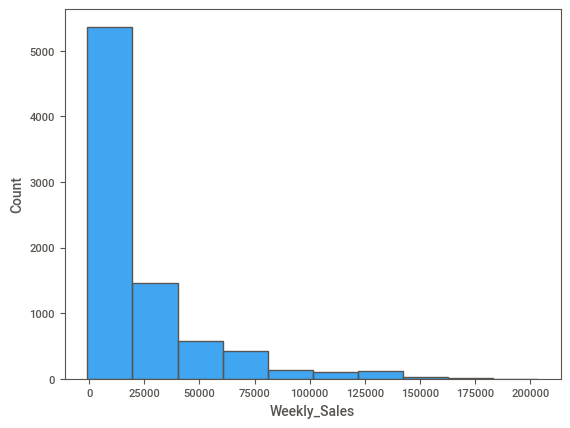

In [354]:
import seaborn as sns
# displot() was deprecated, hence I use histplot()
sns.histplot(data=df_train, x=target, bins=10)
# Over 5k data points have a value from 0 to below 25k. The data is not normally distributed around the mean (~22k), but heavily skewed. There are only few very high values e.g. above 100k.
# The distribution is heavily skewed to the right, which means that the mode is smaller than the median is smaller than the mean.

Notice that there exists nonpositive weekly sales. How many rows are there that the weekly sales are negative or 0?

In [355]:
df_train.index[df_train[target] <= 0].size
# HINT Sum of values less than or equal to 0 in training data
# Expected Output: 13

13

What percentage is the negative and zero sales?

In [356]:
import numpy as np
df_train['Weekly_Sales_Binary'] = np.where(df_train['Weekly_Sales'] <= 0, 1.0, 0.0)
df_train['Weekly_Sales_Binary'].mean()
df_train = df_train.drop(columns=['Weekly_Sales_Binary'])

0.0015863331299572911

<details>
<summary>Expected Output</summary>

`0.0015863331299572911` or `0.16%`
</details>

After communicating your findings, the stakeholders confirm that you can remove these data entries for now and they are launching an investigation with data analysts and data engineers. 

Now remove the negative and zero sales from the training dataset.

In [357]:
df_train = df_train.drop(df_train[df_train.Weekly_Sales <= 0].index)
df_train.shape # Expected Output: (8182, 19)

(8182, 19)

Let's move on to feature engineering. 

Although almost all the features are numerical, should they all be treated as numerical features? Let's inspect the number of unique values. 

What does this tell you?

In [358]:
[(col, df[col].nunique())for col in df_train.columns]

[('Store', 1),
 ('Dept', 77),
 ('Date', 143),
 ('Weekly_Sales', 10042),
 ('IsHoliday', 2),
 ('Temperature', 143),
 ('Fuel_Price', 137),
 ('MarkDown1', 51),
 ('MarkDown2', 41),
 ('MarkDown3', 49),
 ('MarkDown4', 51),
 ('MarkDown5', 51),
 ('CPI', 143),
 ('Unemployment', 12),
 ('Type', 1),
 ('Size', 1),
 ('week', 52),
 ('month', 12),
 ('year', 3)]

`Temperature`, `CPI`, `Unemployment`, `Fuel_Price` are continuous variables. Those tie to the second business objective of looking into the effects from different external factors on weekly sales. 

Put these four features into a list and store it in `external_factors`. 

Earlier we noticed that `MarkDownx` columns contain some missing values, so we will focus on them in a later task. 

In [360]:
external_factors = ['Temperature','CPI','Unemployment', 'Fuel_Price']

Plot `Temperature` using a box plot.

Hint: Set the figure size as (6, 4), and turn off the grid.

❓ Question 5:

Visualize `Temperature` in a box plot, what do you think the advantage of a box plot over histogram? 

A box plot gives you a better understanding of the distribution of the variable by easily seeing the minimum, maximum, lower quartile, upper quartile and median.

You cannot read e.g. the median or lower quartile from a histogram.

<AxesSubplot: >

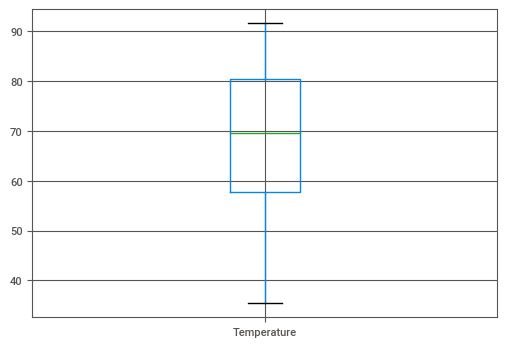

In [361]:
df_train[['Temperature']].boxplot(figsize=(6, 4))

Plot all four numerical features using both distribution plot and box plot. Note any observations.

                                 Numeric Features Distribution                                  


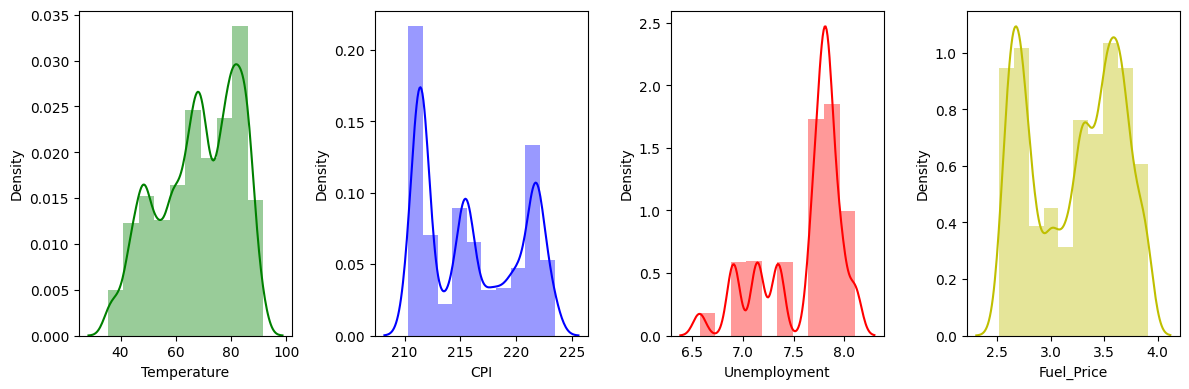

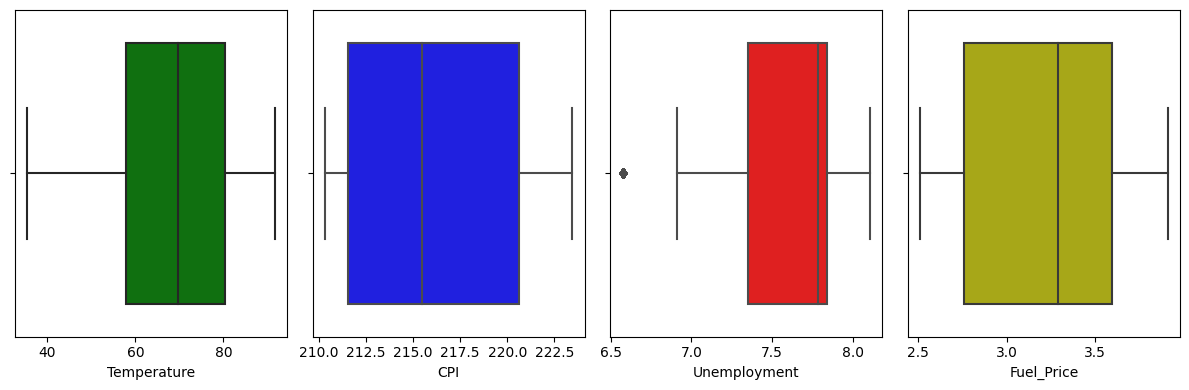

In [261]:
import matplotlib.pyplot as plt
print('\033[1mNumeric Features Distribution'.center(100))

figsize = (12, 4)

n=len(external_factors)
colors = ['g', 'b', 'r', 'y', 'k']

# histogram
plt.figure(figsize=figsize)
for i in range(len(external_factors)):
    plt.subplot(1,n,i+1)
    sns.distplot(df_train[external_factors[i]],
                 bins=10, 
                 color = colors[i])
plt.tight_layout();

# boxplot
plt.figure(figsize=figsize)
for i in range(len(external_factors)):
    plt.subplot(1,n,i+1)
    sns.boxplot(x=df_train[external_factors[i]],
                color=colors[i])
plt.tight_layout();

'''
Observations
-Temperature: clearly skewed to the left  
-CPI: mode is close or equal to minimum
-Unemployment: there is 1 very low outlier, which is shown as single data point on the left
-Fuel_Price: pretty broad range from 2.5 to ~4 
'''

We will investigate the impacts of the external factors later. Now let's scan through the other features.

`Store`, `Type`, and `Size` each have only one unique value, offering no information, so we can safely ignore them. 

We extracted `year`, `month`, and `week` from  `Date`, thus `Date` is redundant; but it is easy to find the date range in the training dataset using `Date`:

In [235]:
df_train['Date'].min(), df_train['Date'].max() 
# Expected Output: (Timestamp('2010-02-05 00:00:00'), Timestamp('2012-10-26 00:00:00'))

(Timestamp('2010-02-05 00:00:00'), Timestamp('2012-10-26 00:00:00'))

Our training data ranges from 5th of February 2010 to 26th of October 2012.

It makes more sense to treat `year`, `month`, `week` as categorical variables, and even more accurately ordinal variables. 

The boolean feature `IsHoliday` can be considered categorical, and so can `Dept`. 

Let's put these column names into a list `categoricalFeatures`.

In [267]:
categoricalFeatures = ['year','month','week','IsHoliday', 'Dept']

For the categorical features, we are interested in the frequency of each value. 
Use `pandas` method `value_counts` to find the number of rows where `IsHoliday` is true and false respectively.

In [268]:
df_train['IsHoliday'].value_counts()

False    7586
True      596
Name: IsHoliday, dtype: int64

<details>
<summary>Expected Output</summary>

```
False    7586
True      596
Name: IsHoliday, dtype: int64
```
</details>

Visualize the distribution of `month`; use `sns.countplot()`.

<AxesSubplot: xlabel='month', ylabel='count'>

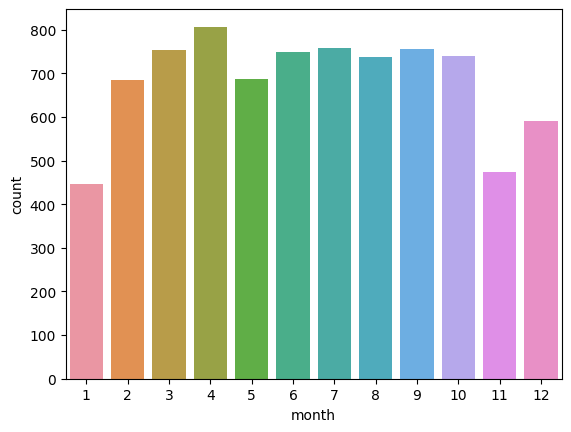

In [269]:
sns.countplot(x=df_train['month'])


Next, let's look into some plots of categorical features. 

                               Visualising Categorical Features:                                


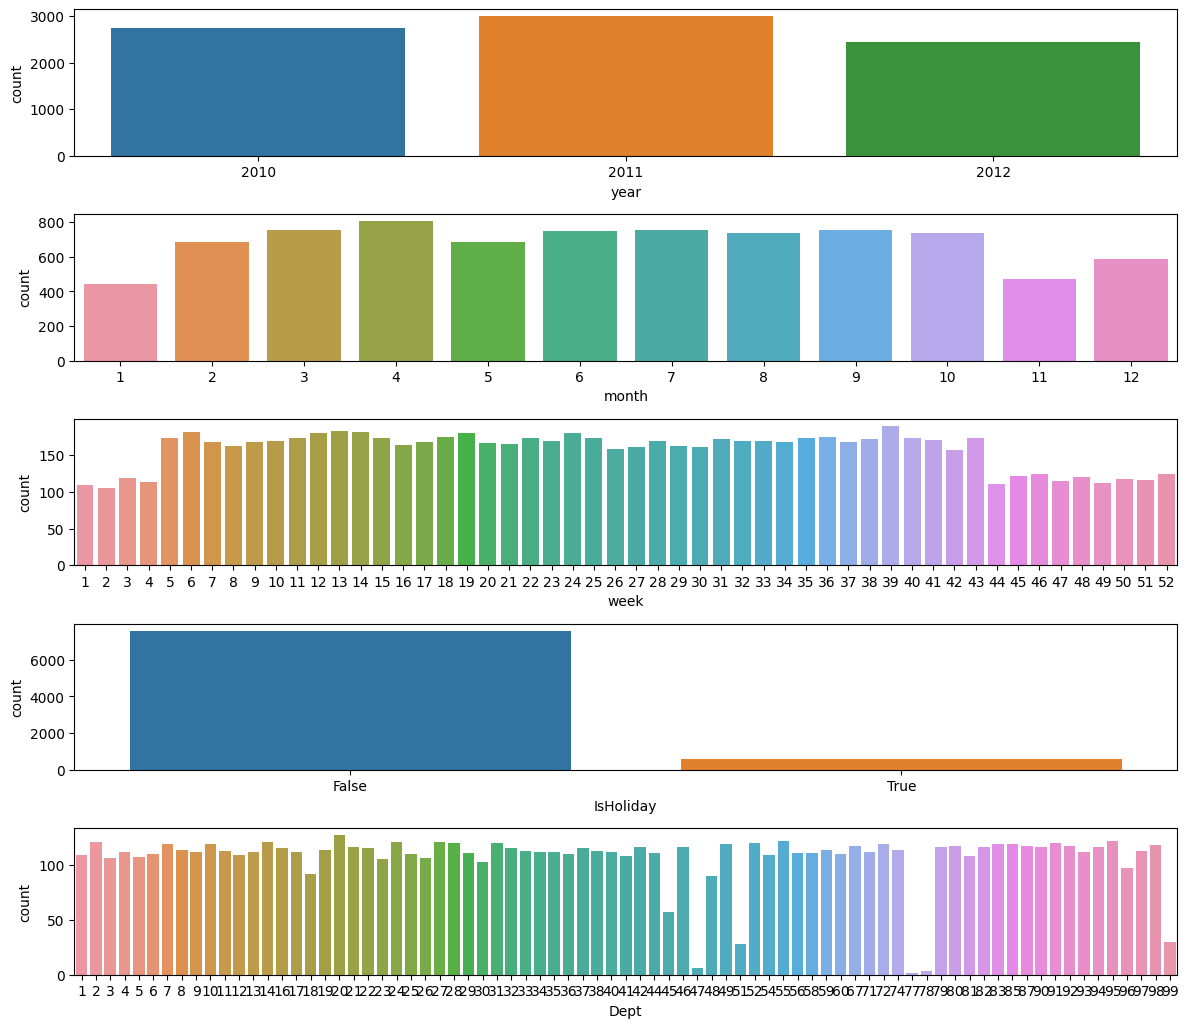

In [274]:
#Visualizing the categorical features 
print('\033[1mVisualising Categorical Features:'.center(100))

plt.figure(figsize=(12,12))

#office hours: was this maybe wrong in initial notebook?
for i in range(len(categoricalFeatures)):
    plt.subplot(6,1,i+1)
    sns.countplot(x=df_train[categoricalFeatures[i]])
plt.tight_layout();

❓ Question 6: 

Discuss with your pair programming partner: 

There is less data in 2012 than the previous two years. Did the sale drop from previous years? Does it affect what we see in the plots for month and week? Does the plot below clarify it to some degree?

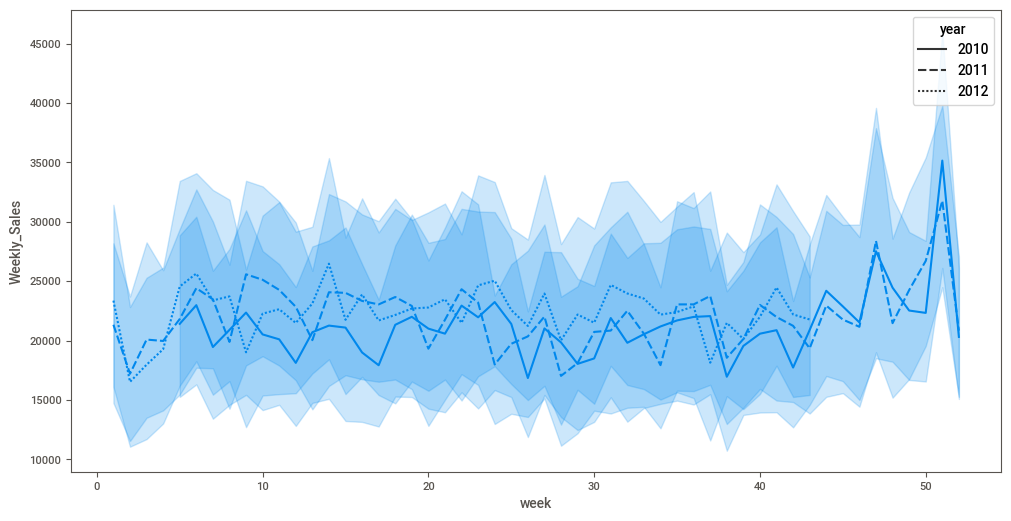

In [308]:
df_train['week'] = df_train['week'].astype('int64')
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_train, x="week", y="Weekly_Sales", style="year");

The 2012 data is missing the last ~8 weeks. Hence, in the plots for months and weeks it looks like there were less sales in those months or weeks, but this is due to lacking data. The plot shows this pretty weel.

## Task III: Impact from Holidays

The first business objective is to understand the impact of holidays on weekly sales. 

There is a feature `IsHoliday` that we can use to calculate the average weekly sales for holiday weeks and non-holiday weeks. 

For this purpose, we can use `.groupBy` and `.mean()`. Are holiday sales higher?

In [367]:
# Yes holiday sales are higher
df_train[['Weekly_Sales', 'IsHoliday']].groupby(by='IsHoliday').mean()

,Weekly_Sales
IsHoliday,
False,"21,756.05"
True,"23,737.05"


<details>
<summary>Expected Output</summary>

```
IsHoliday
False   21,756.05
True    23,737.05
Name: Weekly_Sales, dtype: float64
```
</details>


But we would like to understand it at more granular level. Remember [Simpson's paradox](https://en.wikipedia.org/wiki/Simpson's_paradox)? To save some time,  date mapping are identified for the training data

- Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12
- Labor Day: 10-Sep-10, 9-Sep-11, 7-Sep-12
- Thanksgiving: 26-Nov-10, 25-Nov-11
- Christmas: 31-Dec-10, 30-Dec-11

We provided the code to create a flag for each holiday to help you analyze weekly sale by each holiday type.

In [364]:
superbowl_mask = df_train['Date'].isin(['2010-02-12', '2011-02-11', '2012-02-10'])
laborday_mask = df_train['Date'].isin(['2010-09-10', '2011-09-09','2012-09-07'])
thanksgiving_mask = df_train['Date'].isin(['2010-11-26', '2011-11-25'])
christmas_mask = df_train['Date'].isin(['2010-12-31', '2011-12-30'])

In [365]:
df_train['superbowl'] = superbowl_mask
df_train['laborday'] = laborday_mask
df_train['thanksgiving'] =thanksgiving_mask
df_train['christmas'] = christmas_mask

Run the next cell to see:

1. how many weekly sales happened on Christmas (does it make sense? what did we not account for?)
2. what is the average weekly sales stratified by whether it is Christmas week or not?

In [366]:
df_train.groupby(['christmas'])\
        .agg(count = ('christmas', 'size'), 
             avg_weekly_sales= ('Weekly_Sales','mean'))

,count,avg_weekly_sales
christmas,,
False,8057,"21,921.06"
True,125,"20,565.56"


Perform the same analysis for the other three holidays:

In [369]:
#TODO 
holidays = ['superbowl', 'laborday', 'thanksgiving', 'christmas']
for holiday in holidays:
    summary_stats = df_train.groupby([holiday])\
        .agg(count=(holiday, 'size'),
            avg_weekly_sales=('Weekly_Sales', 'mean'))
    print(summary_stats)
    print()

           count  avg_weekly_sales
superbowl                         
False       8001         21,845.80
True         181         24,311.98

          count  avg_weekly_sales
laborday                         
False      8007         21,884.35
True        175         22,632.78

              count  avg_weekly_sales
thanksgiving                         
False          8067         21,813.97
True            115         27,959.84

           count  avg_weekly_sales
christmas                         
False       8057         21,921.06
True         125         20,565.56



<details>
<summary>Expected Output</summary>

```
           count  avg_weekly_sales
superbowl                         
False       8001         21,845.80
True         181         24,311.98

          count  avg_weekly_sales
laborday                         
False      8007         21,884.35
True        175         22,632.78

              count  avg_weekly_sales
thanksgiving                         
False          8067         21,813.97
True            115         27,959.84

           count  avg_weekly_sales
christmas                         
False       8057         21,921.06
True         125         20,565.56
```
</details>


Without hypothesis testing and only by eyeballing, it seems like Super Bowl and Thanksgiving have a positive impact on the weekly sales for store 1 in the training dataset. 

Discuss with your teammate, are you surprised that during Christmas, sales at Walmart did not go up? Holiday effect, if causal, happened most during Thanksgiving weeks. Is this something you expected?

We have been ignoring `Dept`, let's take a look at the plot below showing the weekly sales by department in 2011. 

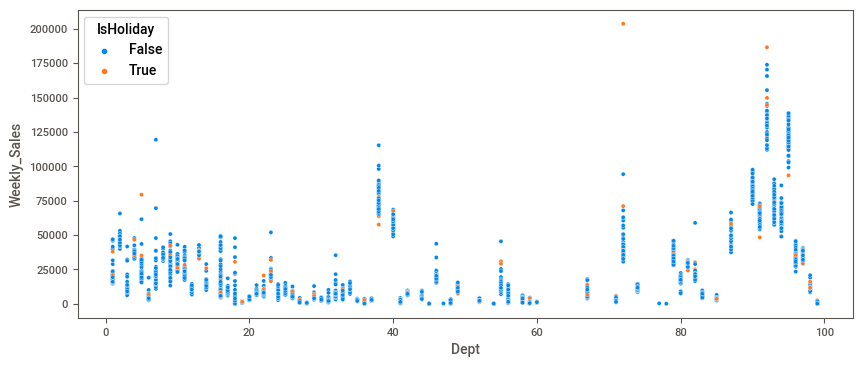

In [321]:
plt.figure(figsize=(10,4))
sns.scatterplot(data=df_train[df_train.year==2011], x = 'Dept', y= target, hue='IsHoliday');

Dept 72 has a very unusual high weekly sales during the holiday week, but we will need more data to understand if this is data issue, outlier, or special event. 

## Task IV: Visualize Relationship between Macroeconomic & External Factors and Sales

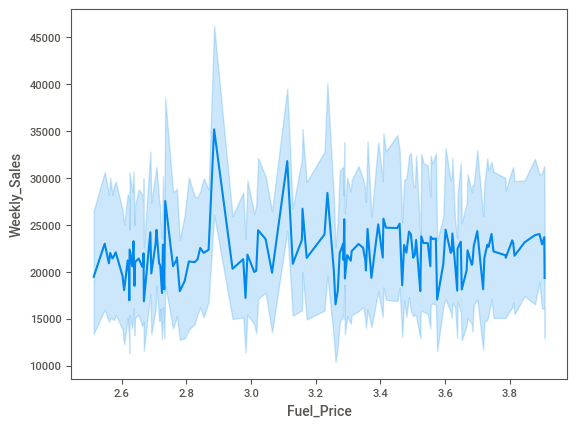

In [370]:
sns.lineplot(data=df_train, x="Fuel_Price", y="Weekly_Sales");

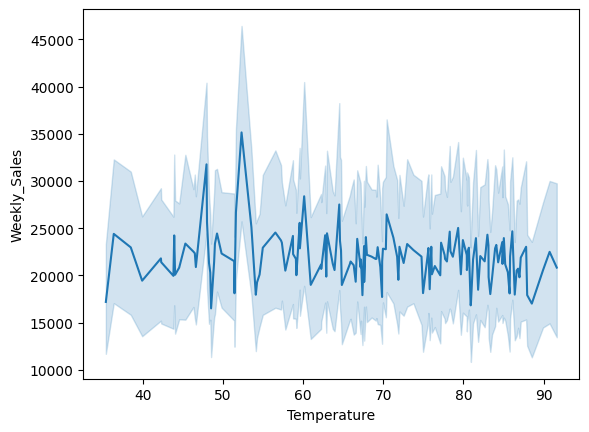

In [282]:
sns.lineplot(data=df_train, x="Temperature", y="Weekly_Sales");

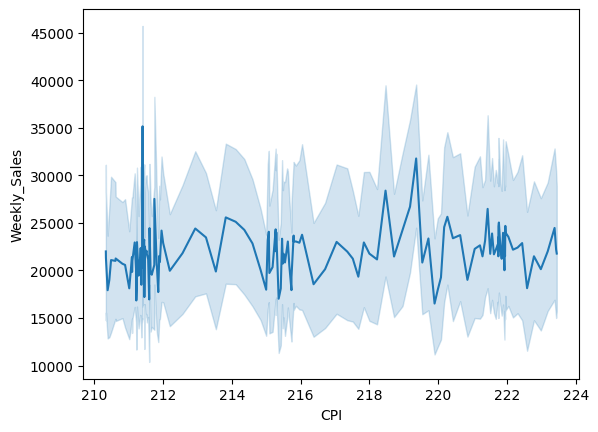

In [283]:
sns.lineplot(data=df_train, x="CPI", y="Weekly_Sales");

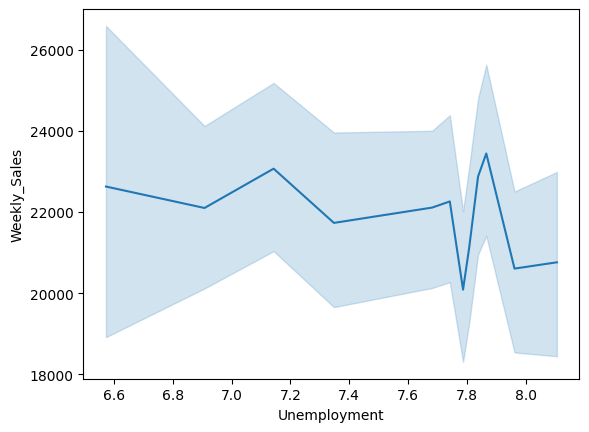

In [284]:
sns.lineplot(data=df_train, x="Unemployment", y="Weekly_Sales");

By eyeballing, do you find strong evidence that these external and macroeconomic factors are correlated with Walmart's weekly sales? Do you think `lineplot` is an appropriate plot to visualize this relationship?

I don't see strong evidence that these macroeconomic factors are correlated with the weekly sales. No, probably a scatter plot would be better.

Lastly, we calculate the spearman correlations between the target and the external factors to verify that there is no strong linear correlation between the target variable and these features.

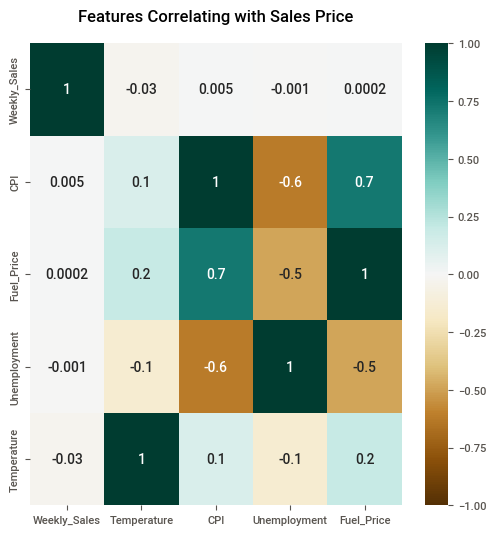

In [322]:
plt.figure(figsize=(6, 6))
df_train_reduced = df_train[[target] + external_factors]
corr = df_train_reduced.corr(method='spearman')
heatmap = sns.heatmap(corr.sort_values(by=target, ascending=False),
                      vmin=-1, vmax=1, annot=True, fmt='.1g', cmap='BrBG')
heatmap.set_title('Features Correlating with Sales Price', fontdict={'fontsize':12}, pad=16);

## Task V: Feature Engineering

"*Feature Engineering encapsulates various data engineering techniques such as selecting relevant features, handling missing data, encoding the data, and normalizing it. It is one of the most crucial tasks and plays a major role in determining the outcome of a model.*" [Ref](https://www.analyticsvidhya.com/blog/2021/10/a-beginners-guide-to-feature-engineering-everything-you-need-to-know/).

One part of feature engineering is to create new features from the given data, like the `thanksgiving` column that was earlier derived from `Date`. 

Common techniques for tabular data include adding summary statistics of the numerical features such as mean and standard deviation, and creating new features from the interaction of multiple features, etc. 

In this task, we will work on handling missing data, normalizing numerical features, and encoding categorical features. 

First, let's focus on missing data. Missing value treatment is crucial, yet not trivial. Take a read on [Tackling Missing Value in Dataset](https://www.analyticsvidhya.com/blog/2021/10/handling-missing-value/) for detailed explanation. Features with nulls or wrong values (e.g., negative fuel price) needs to be imputed or removed. 

- Do you want to keep the features with missing value? Discuss the trade offs with your teammate.
- If the answer to the first question is yes, then how do you want to impute them? Discuss the trade offs with your teammate.

From the earlier steps, we observed that only the markdown columns contain missing values, however we do not have more information on what those columns represent exactly.  

In [323]:
df_train.columns[df_train.isna().sum() != 0]

Index(['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'], dtype='object')

For each column, find out the percentage of the data is missing.

In [326]:
md_cols = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
for col in ['MarkDown'+str(i) for i in range(1,6)]:
    perc_missing =  df_train[col].isna().sum() / df_train[col].size
    print (f'{col}: {perc_missing:.0%} is missing')

MarkDown1: 64% is missing
MarkDown2: 70% is missing
MarkDown3: 65% is missing
MarkDown4: 64% is missing
MarkDown5: 64% is missing


<details>
<summary>Expected Output</summary>

```
MarkDown1: 64% is missing
MarkDown2: 70% is missing
MarkDown3: 65% is missing
MarkDown4: 64% is missing
MarkDown5: 64% is missing
```
</details>


The majority of the markdown fields are missing. This is where, again, we need to communicate with the stakeholders to understand what the data measure, how the data was collected and then determine our strategy from there. Since we want to understand the impacts of `MarkDownx` on weekly sales, we will keep the features and impute the missing values.  We have learned that there are tradeoffs with how we treat missing values and that our choice of imputation can be significantly impacted by extreme values and the amount of the missing data.  We choose to impute with the median here to mitigate these negative impacts. Use `.fillna()` to impute the missing values.

In [334]:
# TODO
for col in ['MarkDown'+str(i) for i in range(1,6)]:
    df_train = df_train[col].fillna(5)

KeyError: 'MarkDown1'

In [335]:
(df_train.isna().sum() != 0).sum() # sanity check: 0

0

Visualize the distributions for those markdown fields after imputations, are they normal?

In [ ]:
plt.figure(figsize=figsize)
for i in range(len(md_cols)):
    plt.subplot(1,len(md_cols),i+1)
    sns.distplot(df_train[md_cols[i]],
                 hist_kws=dict(linewidth=2),
                 bins=10, 
                 color = colors[i])
plt.tight_layout();

Note that missing values are different from outliers. Outliers, on the other hand, are feature values that are rare in nature. They can unncessarily skew the data and cause problem for modeling. Outlier treatment involves removing or imputing such values. One popular approach to identify outliers is IQR; that is, data points that lie 1.5 times of IQR above Q3 (third quartile) and below Q1 (first quartile) are outliers. Take a read on [Detecting and Treating Outliers](https://www.analyticsvidhya.com/blog/2021/05/detecting-and-treating-outliers-treating-the-odd-one-out/). 

We will leave it as an optional exercise for you to identify outliers using IQR, and replace the outliers with the median.

Now let's see how we can normalize the data. For numerical features it means scaling the features to be of similar range. This step is crucial for machine learning algorithms that calculate distances between data (e.g., read [The Importance of Feature Scaling](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html). 

For this task, let's keep `Temperature` from the external features, since it is the most linearly correlated with the target variable, though very weak and negative. 

In addition, we include one markdown field. Since neither seems to follow normal distributions, it is safer to use `MinMaxScaler` from `sklearn.preprocessing` to transform features by scaling each feature to a given range (See discussion on [Normalization vs Standardization](https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/))

In [ ]:
from sklearn.preprocessing import MinMaxScaler

numericalFeatures = ['Temperature', 'MarkDown1']
df_train_num = df_train[numericalFeatures]

In [ ]:
df_train_num.describe() # Check the summary statistics

Instantiate a MinMaxScaler and fit using `df_train_num`:

In [ ]:
scaler = # YOUR CODE HERE

Now transform training data `df_train_num` and store the resulting nparray in `train_norm`:

In [ ]:
train_norm = scaler.transform(df_train_num) 

Verify that both columns now have minimum 0 and maximum 1. 

In [ ]:
pd.DataFrame(train_norm, columns=df_train_num.columns).describe()

Let's turn to categorical fatures. So far most Python packages for modeling do not accept strings as an input. Thus, encoding the categorical value to numerical value is a necessary step. Here, let's apply [one-hot encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) on `Dept` and `IsHoliday`:

In [ ]:
from sklearn.preprocessing import OneHotEncoder
categoricalFeatures = ['Dept', 'IsHoliday']
df_train_cat = df_train[categoricalFeatures]
ohe = OneHotEncoder(handle_unknown='ignore',sparse = False).fit(df_train_cat)

Transform the categorical features using one hote encoding `ohe`. 

In [ ]:
train_ohe = # YOUR CODE HERE

In [ ]:
train_ohe.shape, df_train_cat.shape # Expected Output: ((8182, 79), (8182, 2))

The number of columns explodes from 2 to 79. 

Lastly we merge the processed numerical features with the processed categorical features using `hstack` in `numpy`:

In [ ]:
import numpy as np
X_train = np.hstack([train_norm, train_ohe])

In [ ]:
X_train.shape # sanity check: (8182, 81)

What about the test data?

Yes, you need to apply the same data processing. But be careful for the data leakage! 

We spare some copy + paste + edit and see how this can be done when we introduce `pipeline` next. 

## Task VI: Pipeline

Even with less than 20 features in our dataset, there are many possibilities that you can do when preprocessing the data. 

There is no one-fits-all approach; often you will find yourself experimenting with many combinations to achieve better modelling performance: Should I apply normalization or standardization? Do I remove the outliers or should I impute them? Do I impute the missing values with median or mean or 0? Answers to many of these questions is "It depends." (Have you heard [Graduate Student Descent](https://sciencedryad.wordpress.com/2014/01/25/grad-student-descent/)?) That means trial-and-error and it is not efficient to produce a notebook each time when you need to try something slightly different. You will get lost quickly. `Pipeline` is one useful tool. 

Not only does `Pipeline` help streamline the process, and keeps the code modular, but also reduces the possibility of introducing errors and bugs. 

In this task, we build the pipeline following the strategies used in the last task, run a simple linear regression model, and print out the model's performance. Note that there is minimal code required for you to implement, the key is to understand each step.

To avoid confusion, let's read the data again directly from `train-store1.csv`.

In [ ]:
df = pd.read_csv('../dat/train-store1.csv')

In [ ]:
df.shape

Separating the target `y` from the features `X`:

In [ ]:
X, y = df.drop(columns=target), df[target]

Import `Pipeline` from submodule `sklearn.pipeline`

In [ ]:
from sklearn.pipeline import Pipeline

Now we build a data transformation for numerical features following two steps: impute the missing values with the feature median (use `SimpleImputer`), followed by normalization (use `MinMaxScaler`). 

Note - do not confuse "transformers" that are part of data preprocessing with the deep learning models with the same name.

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
numeric_features = ['CPI', 'MarkDown1']
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")), 
    # YOUR CODE HERE
])

For categorical features, we apply one hot encoding `OneHotEncoder` ( there are many other options; see [Scikit-learn documentation](https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features) ):

In [ ]:
categorical_features = ['Dept', 'IsHoliday']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

Piece the `numeric_transformer` and `categorical_transformer` using `ColumnTransformer`:

In [ ]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

Lastly, let's append the regression model to preprocessing pipeline to complete a full prediction pipeline.

In [ ]:
from sklearn.linear_model import LinearRegression

model = Pipeline(
    steps=[("preprocessor", preprocessor), ("model", LinearRegression())]
)

The pipeline has been built! The rest is to 
- split the data into training and testing sets
- apply the pipeline to the training data
- obtain the prediction performance on testing data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Let's run the prediction!

In [ ]:
model.fit(X_train, y_train)

In [ ]:
print("model score: %.3f" % model.score(X_test, y_test))

Optional: Discuss what type of [Feature Selection](https://scikit-learn.org/stable/modules/feature_selection.html#feature-selection) strategy you would use to select the features.

## Automating EDA

In this exercise, you have learned the manual way to perform EDA.  Doing EDA manually has the benefits of customization, but is also highly repetitive.  For this reason, a lot of EDA can easily be automated!  In automating our EDA, we can get to know our data more quickly and spend more time on feature engineering and modeling.  Let's check out a library called [SweetViz](https://github.com/fbdesignpro/sweetviz) to see how we can automate EDA! 

                                             |          | [  0%]   00:00 -> (? left)

AttributeError: module 'numpy' has no attribute 'warnings'

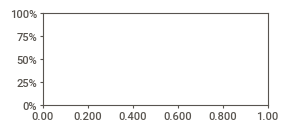

In [287]:
import sweetviz as sv

orig_data_report = sv.analyze(df)
orig_data_report.show_notebook()

1. Click on a feature to tab to explore the feature in more detail.
2. Notice that `SweetViz` calculates the descriptive stats for each feature, along with its missing and duplicate value stats.
3. Notice that `SweetViz` helps to detect numerical vs categorical datatypes.
4. Click on the `ASSOCIATIONS` tab to explore associations/correlations!

### Prefer a browser experience?

In [ ]:
orig_data_report.show_html('orig_data_report.html', open_browser=True)

### Now let's have a look at a comparison report of our train and test datasets!

In [ ]:
compare_report = sv.compare([X_train, 'Train'], [X_test, 'Test'])
compare_report.show_notebook()

## Note

- EDA, like other parts of machine learning, is an iterative process, NOT linear.
- This analysis is far from being comprehensive; rather it is a starting point. 
- There does not exist one "standard" way to perform EDA. You should always keep business objectives in mind and perform analysis as seen fit. It is one of those skills that grows with lots of practices.

## References

1. Original dataset is from [kaggle: wallmart sales forecast datasets](https://www.kaggle.com/datasets/iamprateek/wallmart-sales-forecast-datasets)
2. Notebook: [craking the walmart sales forecasting challenge](https://www.kaggle.com/code/fernandol/cracking-the-walmart-sales-forecasting-challenge)